# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### Business Understanding

Given the business requirement to pinpoint the primary factors influencing the prices of used cars, the task, translated into a data-centric problem, is to examine historical used car data and extract the most influential variables that predict the price of a used car. 

The used car dealership aims to identify the features and data points within their historical data that are most influential in determining the price of a used car. This analysis will help predict the price of used cars by determining which data points are most beneficial for building a predictive model.

### Familiarizing with the data:

Understanding the dataset: Take time to explore and get to know the dataset.
Identifying data quality issues: As you become familiar with the data, identify any quality issues that may be present.
Finding relevant information: Explore the dataset to uncover information that may be relevant and could inform your business understanding.

### Data Understanding Steps
- Data Collection: Gather the necessary data.
- Data Description: Describe the characteristics of the data.
- Data Exploration: Analyze the data to uncover patterns and insights.
- Data Quality Verification: Ensure the accuracy and reliability of the data.

### Data Collection


In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

df= pd.read_csv('vehicles.csv')

In [2]:
df.info()
df.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426870,7301592119,wyoming,22990,2020.0,hyundai,sonata se sedan 4d,good,NaN,gas,3066.0,clean,other,5NPEG4JAXLH051710,fwd,NaN,sedan,blue,wy
426871,7301591639,wyoming,17990,2018.0,kia,sportage lx sport utility 4d,good,NaN,gas,34239.0,clean,other,KNDPMCAC7J7417329,NaN,NaN,SUV,NaN,wy
426872,7301591201,wyoming,32590,2020.0,mercedes-benz,c-class c 300,good,NaN,gas,19059.0,clean,other,55SWF8DB6LU325050,rwd,NaN,sedan,white,wy
426873,7301591202,wyoming,30990,2018.0,mercedes-benz,glc 300 sport,good,NaN,gas,15080.0,clean,automatic,WDC0G4JB6JV019749,rwd,NaN,other,white,wy
426874,7301591199,wyoming,33590,2018.0,lexus,gs 350 sedan 4d,good,6 cylinders,gas,30814.0,clean,automatic,JTHBZ1BLXJA012999,rwd,NaN,sedan,white,wy
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [3]:
df.head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


### Analyzing data for missing values, null, zeros 

In [4]:
null_counts = df.isnull().sum()
total_rows = len(df)
null_percentages = (null_counts / total_rows) * 100

print(null_percentages)


id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


### Condition, Cylinders, Drive, Size, Type and Pain Color  needs further investigation

In [5]:
df['condition'].value_counts(dropna=False)

condition
NaN          174104
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

In [6]:
# Replace NaN with Good

df['condition'] = df['condition'].fillna('good')
df['condition'].isnull().sum()

0

In [7]:
df['cylinders'].value_counts(dropna=False)

cylinders
NaN             177678
6 cylinders      94169
4 cylinders      77642
8 cylinders      72062
5 cylinders       1712
10 cylinders      1455
other             1298
3 cylinders        655
12 cylinders       209
Name: count, dtype: int64

In [8]:
# Fill NaN value with most popular value of 6 cylinders. 
df['cylinders'].fillna('6 cylinders', inplace=True)

In [9]:
df['cylinders'].value_counts(dropna=False)

cylinders
6 cylinders     271847
4 cylinders      77642
8 cylinders      72062
5 cylinders       1712
10 cylinders      1455
other             1298
3 cylinders        655
12 cylinders       209
Name: count, dtype: int64

In [10]:
# Dropping VIN, ID 
df.drop(axis=1, columns= 'VIN', inplace=True)

In [11]:
df['id'].duplicated().sum()

0

In [12]:
# Dropping col which are not adding value to the prices

df.drop(axis=1, columns= 'id', inplace=True)
df.drop(axis=1, columns= 'region', inplace=True)
df.drop(axis=1, columns= 'title_status', inplace=True)
df.drop(axis=1, columns= 'state', inplace=True)
df.drop(axis=1, columns= 'paint_color', inplace=True)


In [13]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type
0,6000,NaN,NaN,NaN,good,6 cylinders,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,good,6 cylinders,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,good,6 cylinders,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,good,6 cylinders,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,good,6 cylinders,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
## Checkin Drive col

df['drive'].value_counts(dropna=False)

drive
4wd    131904
NaN    130567
fwd    105517
rwd     58892
Name: count, dtype: int64

In [15]:
## Replace NaN with 4 wheel 
df['drive'].fillna('4wd', inplace=True)
df['drive'].value_counts(dropna=False)

drive
4wd    262471
fwd    105517
rwd     58892
Name: count, dtype: int64

In [16]:
df['size'].value_counts(dropna=False)

size
NaN            306361
full-size       63465
mid-size        34476
compact         19384
sub-compact      3194
Name: count, dtype: int64

In [17]:
## Drop Size as it is mostly null
df.drop(axis=1, columns= 'size', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   condition     426880 non-null  object 
 5   cylinders     426880 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   transmission  424324 non-null  object 
 9   drive         426880 non-null  object 
 10  type          334022 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 35.8+ MB


In [18]:
df['type'].fillna('sedan', inplace=True)
df['type'].value_counts(dropna=False)

type
sedan          179914
SUV             77284
pickup          43510
truck           35279
other           22110
coupe           19204
hatchback       16598
wagon           10751
van              8548
convertible      7731
mini-van         4825
offroad           609
bus               517
Name: count, dtype: int64

In [19]:
null_counts = df.isnull().sum()
total_rows = len(df)
null_percentages = (null_counts / total_rows) * 100

# Print the result
print(null_percentages)


price           0.000000
year            0.282281
manufacturer    4.133714
model           1.236179
condition       0.000000
cylinders       0.000000
fuel            0.705819
odometer        1.030735
transmission    0.598763
drive           0.000000
type            0.000000
dtype: float64


In [20]:
df = df.dropna()
df.duplicated().sum()

167859

### Remove Duplicates 

In [21]:
df = df = df.drop_duplicates()

In [22]:
df.duplicated().sum()

0

In [23]:
df.dtypes

price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
transmission     object
drive            object
type             object
dtype: object

### Checking the unique values in each cols

In [24]:
df.describe()

,price,year,odometer
count,2.284750e+05,228475.000000,2.284750e+05
mean,9.359819e+04,2009.961628,1.098353e+05
std,1.495012e+07,9.726097,2.180163e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,4.995000e+03,2007.000000,5.288000e+04
50%,1.000000e+04,2012.000000,9.995100e+04
75%,1.995000e+04,2016.000000,1.450005e+05
max,3.736929e+09,2022.000000,1.000000e+07


<Axes: xlabel='price'>

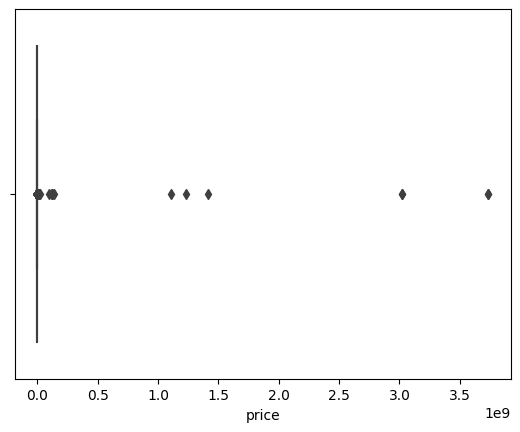

In [25]:
# Basic plot on price after cleanup
sns.boxplot(df, x="price")

### There are outliers beyond price point of 55K

<Axes: xlabel='price'>

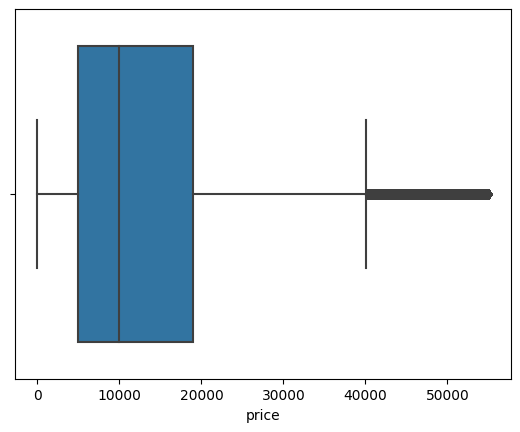

In [26]:
df = df.query('price < 55000')
sns.boxplot(df, x="price")

### Exclucing the outliers in price. 

<Axes: xlabel='price', ylabel='Count'>

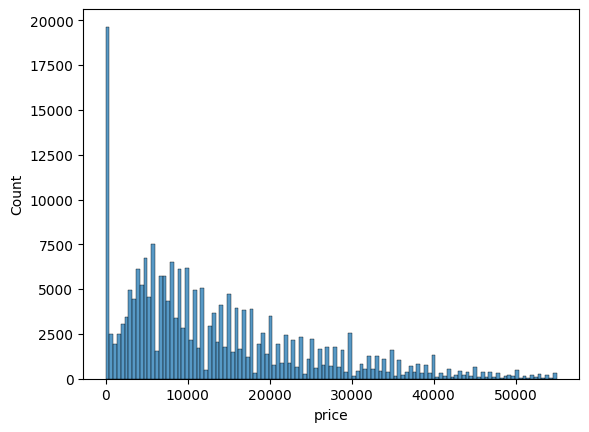

In [27]:
sns.histplot(df, x="price")

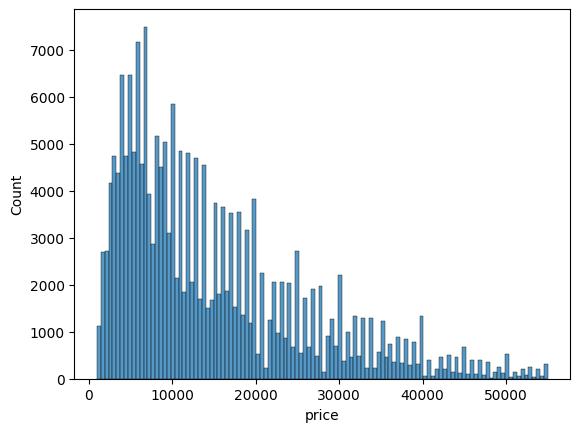

In [28]:
# Cleaning up records with price < 1000
df = df.query('price > 1000')
fig = sns.histplot(df, x="price")

<Axes: xlabel='year', ylabel='Count'>

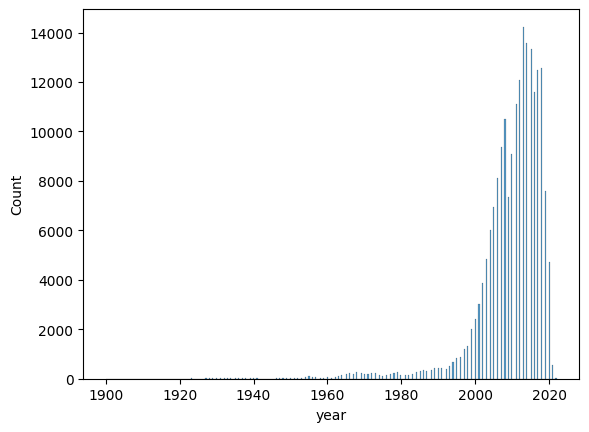

In [29]:
#Explore Car records by year
sns.histplot(df,x='year')

<Axes: xlabel='manufacturer'>

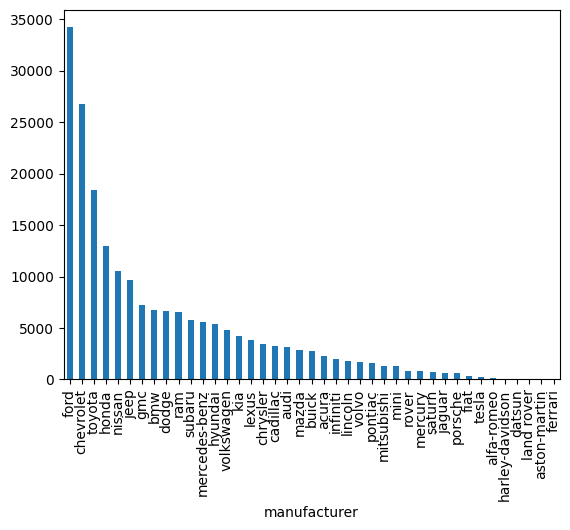

In [30]:
### Let us explore categorical columns
df['manufacturer'].value_counts().plot(kind='bar')

In [31]:
df['cylinders'].value_counts()

cylinders
6 cylinders     115872
4 cylinders      48407
8 cylinders      34318
5 cylinders       1157
10 cylinders       577
other              561
3 cylinders        300
12 cylinders        74
Name: count, dtype: int64

In [32]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Select categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical columns:", numerical_columns)
print("Categorical columns:", categorical_columns)

Numerical columns: ['price', 'year', 'odometer']
Categorical columns: ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'type']


In [33]:
df['drive'].value_counts()

drive
4wd    116758
fwd     56615
rwd     27893
Name: count, dtype: int64

In [34]:
df['type'].value_counts()

type
sedan          92776
SUV            40679
truck          15110
pickup         14679
coupe           7944
hatchback       7213
other           5806
wagon           5104
convertible     4070
van             4054
mini-van        3177
offroad          466
bus              188
Name: count, dtype: int64

In [35]:
df['transmission'].value_counts()

transmission
automatic    176405
manual        14571
other         10290
Name: count, dtype: int64

In [36]:
df['transmission'].value_counts()

transmission
automatic    176405
manual        14571
other         10290
Name: count, dtype: int64

<Axes: xlabel='fuel'>

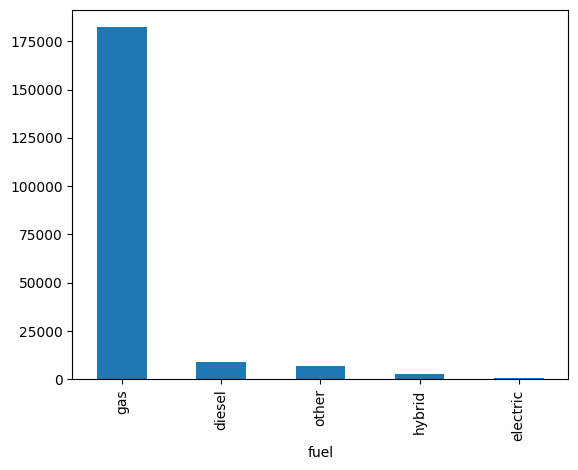

In [37]:
df['fuel'].value_counts().plot(kind='bar')

## Explore the relationship of these features to price which we want to predict. 

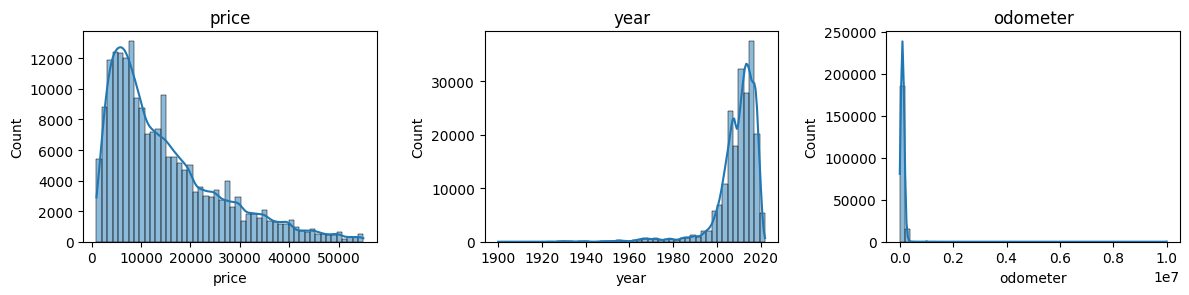

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
for feature in numerical_columns:
    plt.subplot(3, 3, numerical_columns.index(feature) + 1)
    sns.histplot(data=df[feature], bins=50, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

## There seem to be some odometer outliers, we need to take care of them 

608


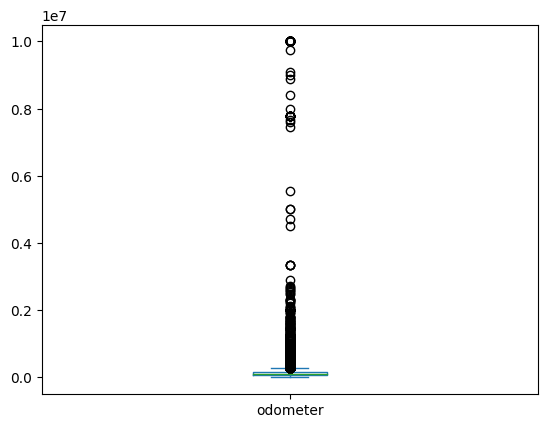

In [39]:
df['odometer'].sort_values(ascending=False).plot(kind='box')
percentage_over_40000 = (len(df[df['odometer'] > 400000]))
print(percentage_over_40000)

In [40]:
# Remove outlier cars
df =  df[df['odometer'] <= 250000]

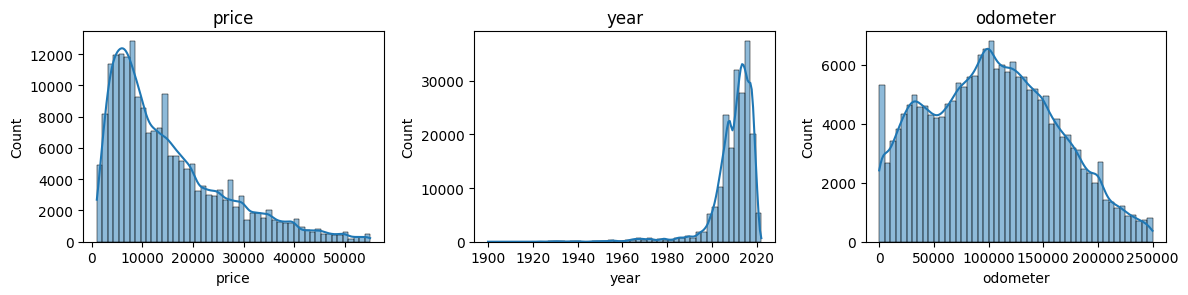

In [41]:
plt.figure(figsize=(12, 8))
for feature in numerical_columns:
    plt.subplot(3, 3, numerical_columns.index(feature) + 1)
    sns.histplot(data=df[feature], bins=50, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

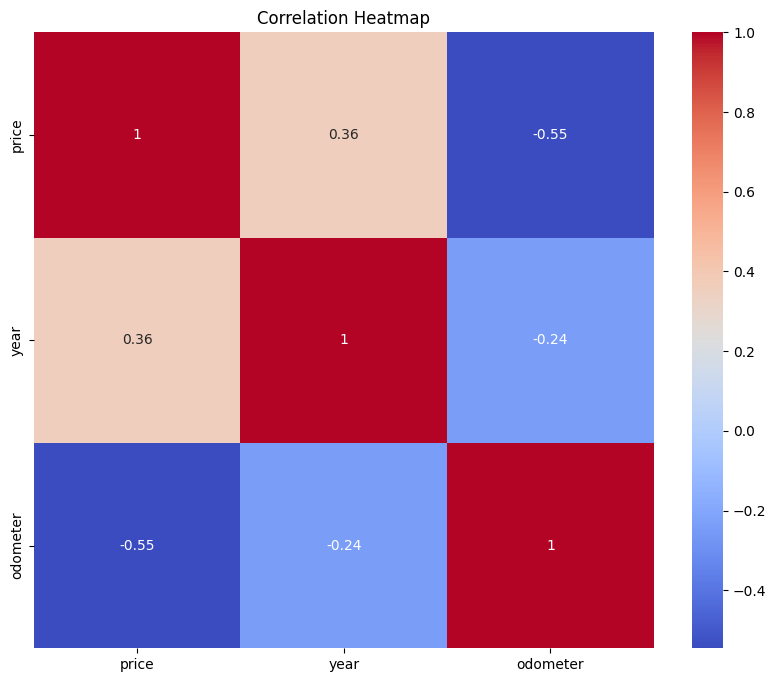

In [42]:
# Correlation Analysis
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

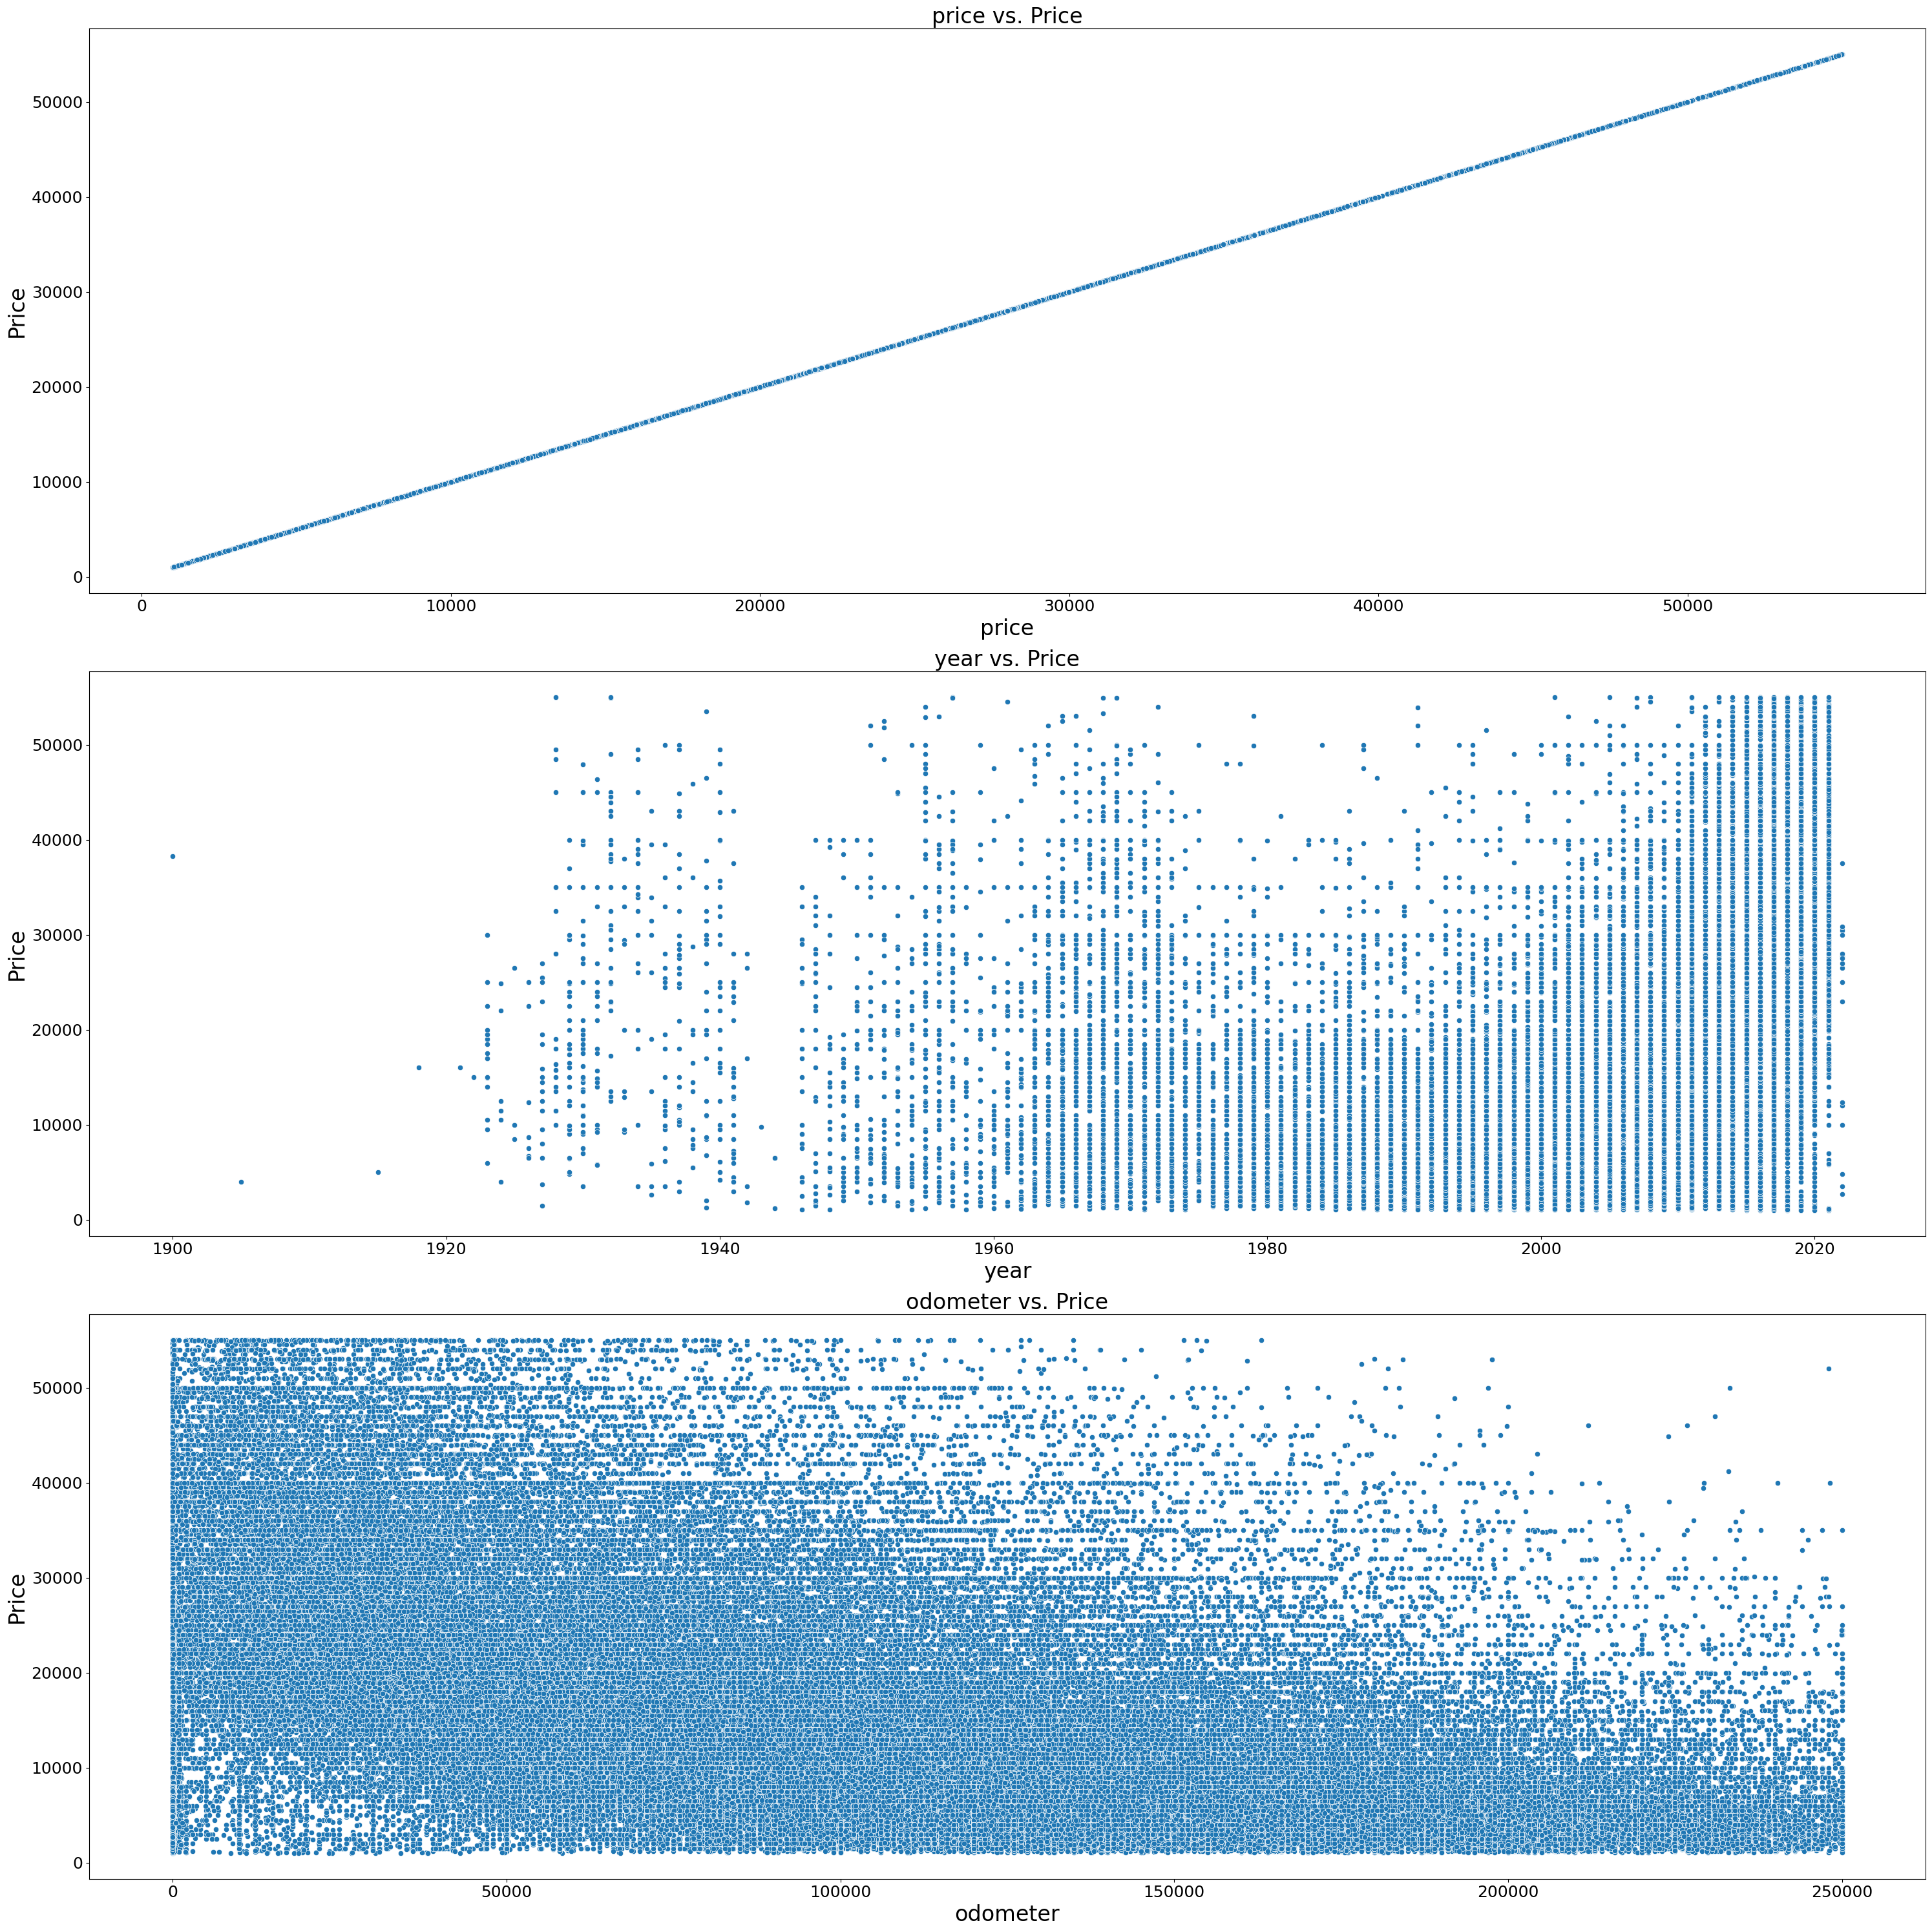

In [43]:
# Categorical Feature vs. Price
plt.figure(figsize=(30, 30))
for feature in numerical_columns:
    plt.subplot(3, 1, numerical_columns.index(feature) + 1)
    sns.scatterplot(data=df, x=feature, y='price')
    plt.title(f'{feature} vs. Price', fontsize=24)
    plt.xlabel(f'{feature}', fontsize=24)
    plt.ylabel('Price', fontsize=24)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
plt.tight_layout()
plt.show()

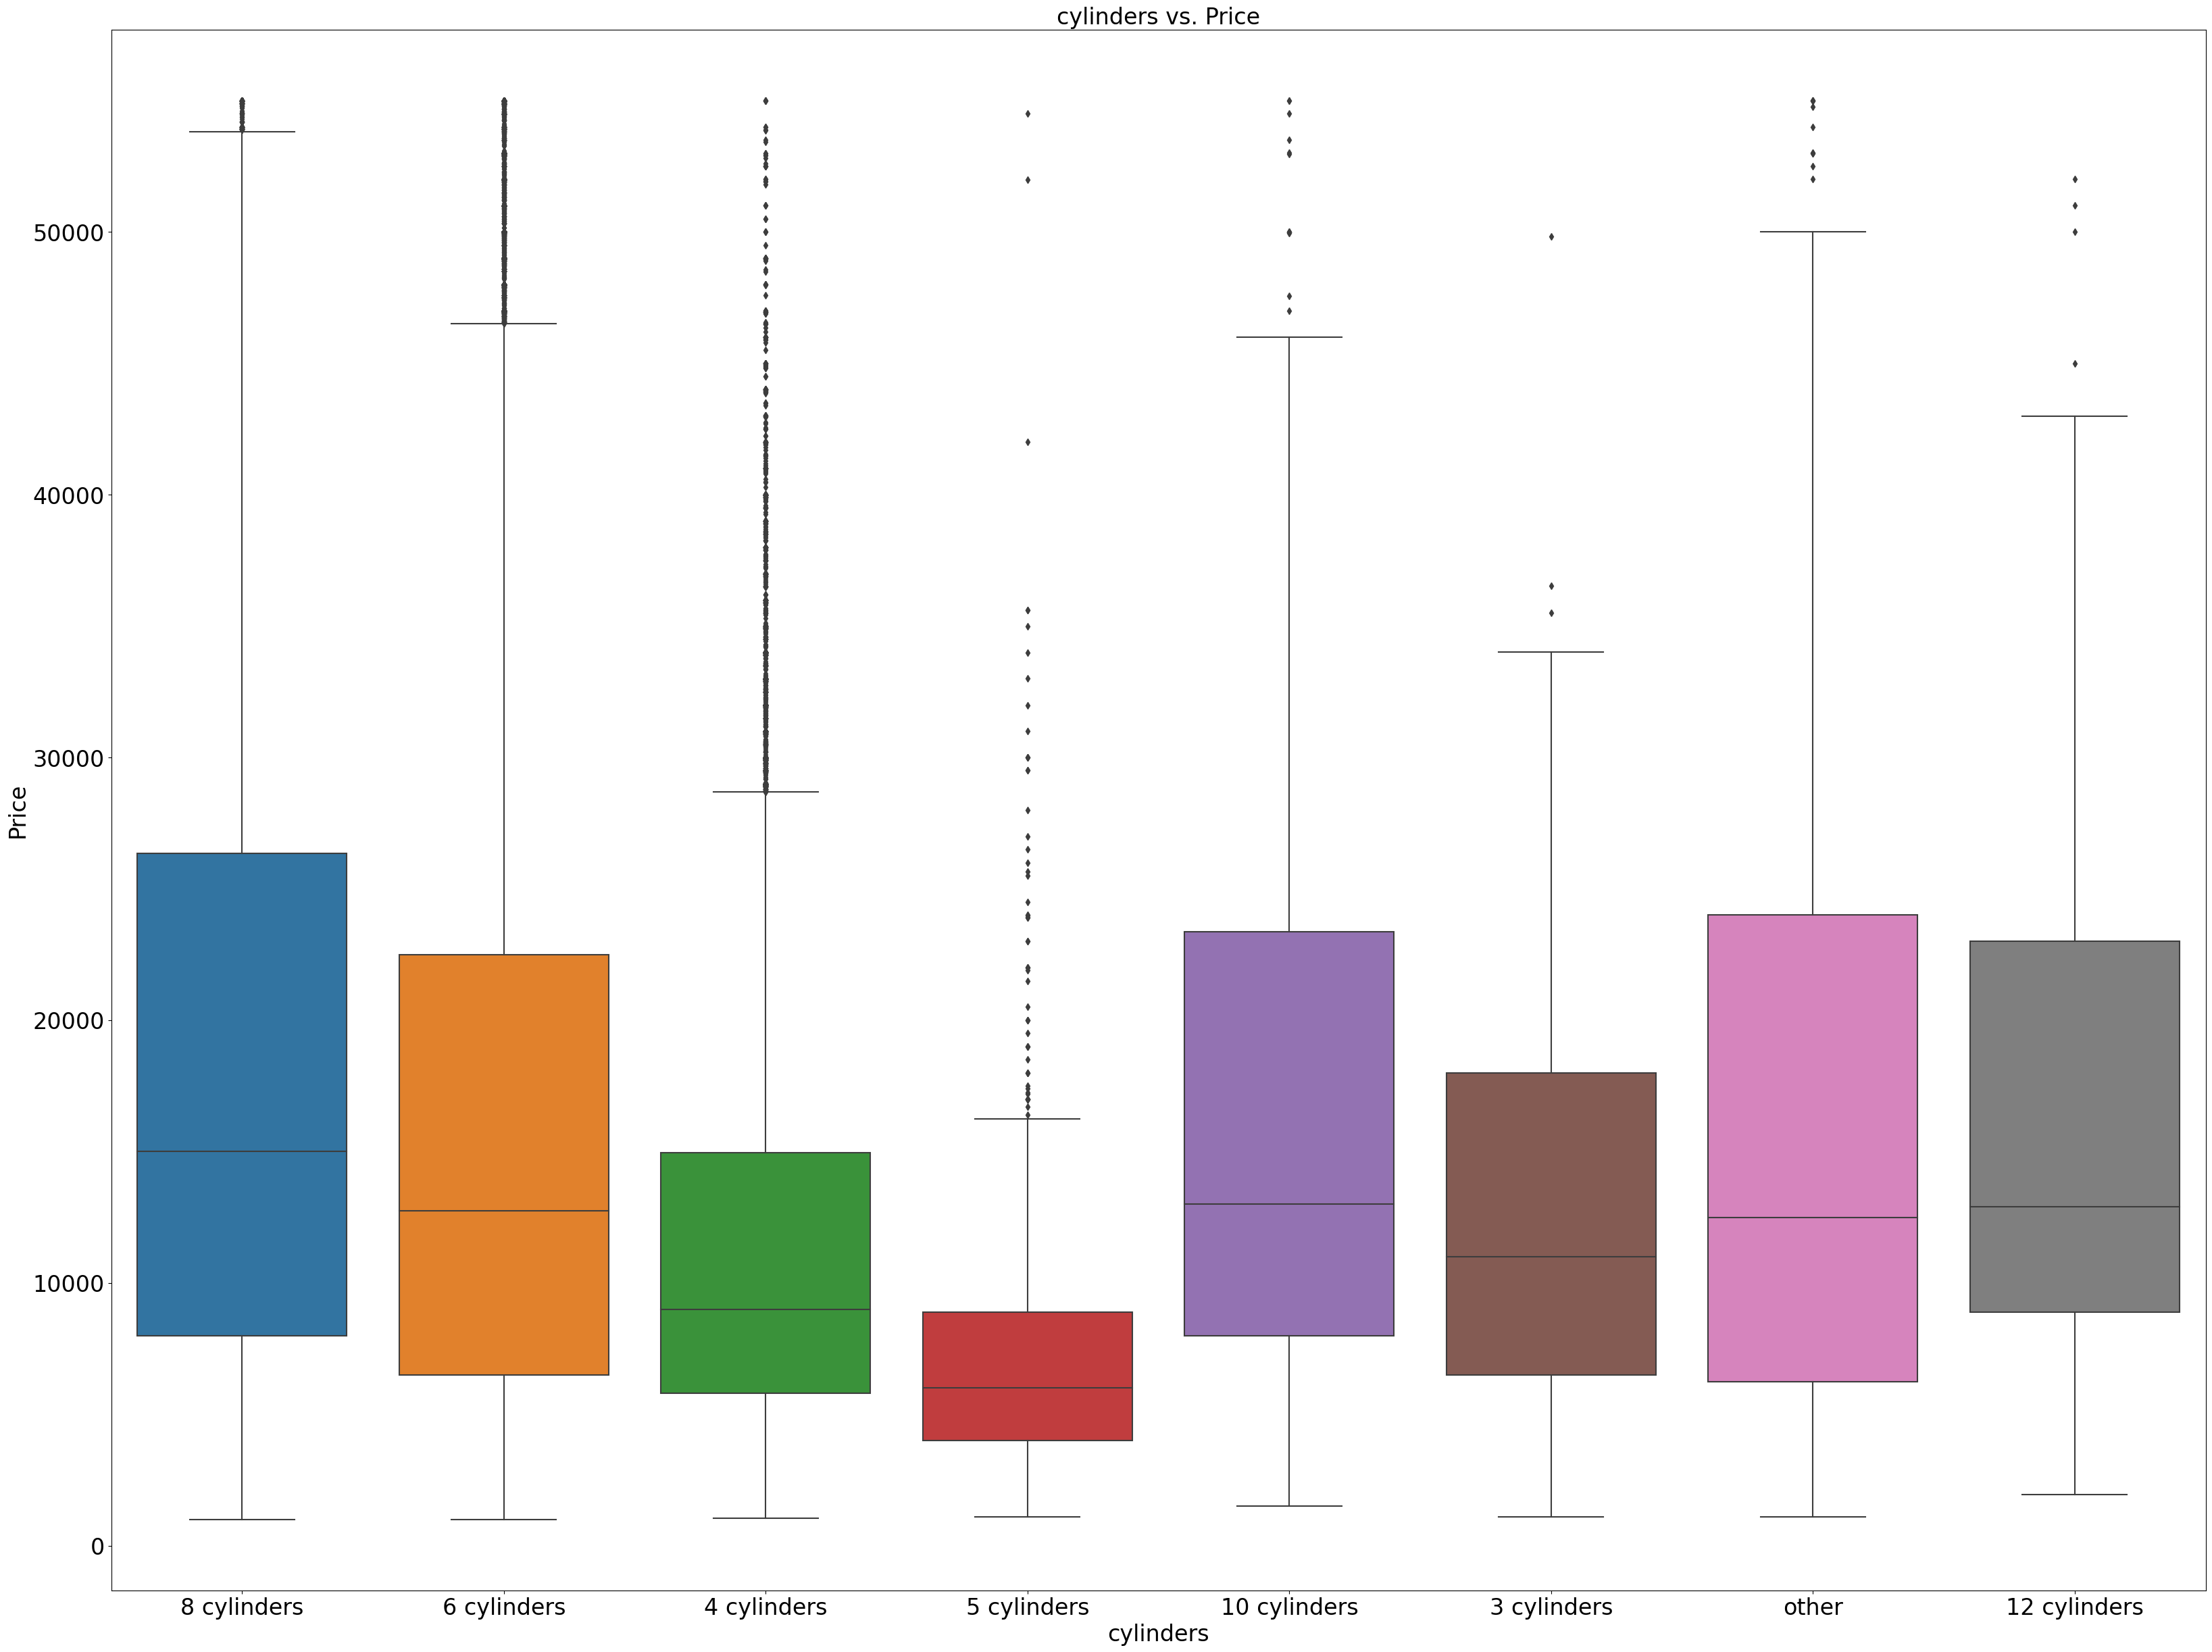

In [46]:
# Categorical Feature vs. Price
plt.figure(figsize=(40, 30))
sns.boxplot(data=df, x='cylinders', y='price')
plt.title('cylinders vs. Price', fontsize=24)
plt.xlabel('cylinders', fontsize=24)
plt.ylabel('Price', fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.show()

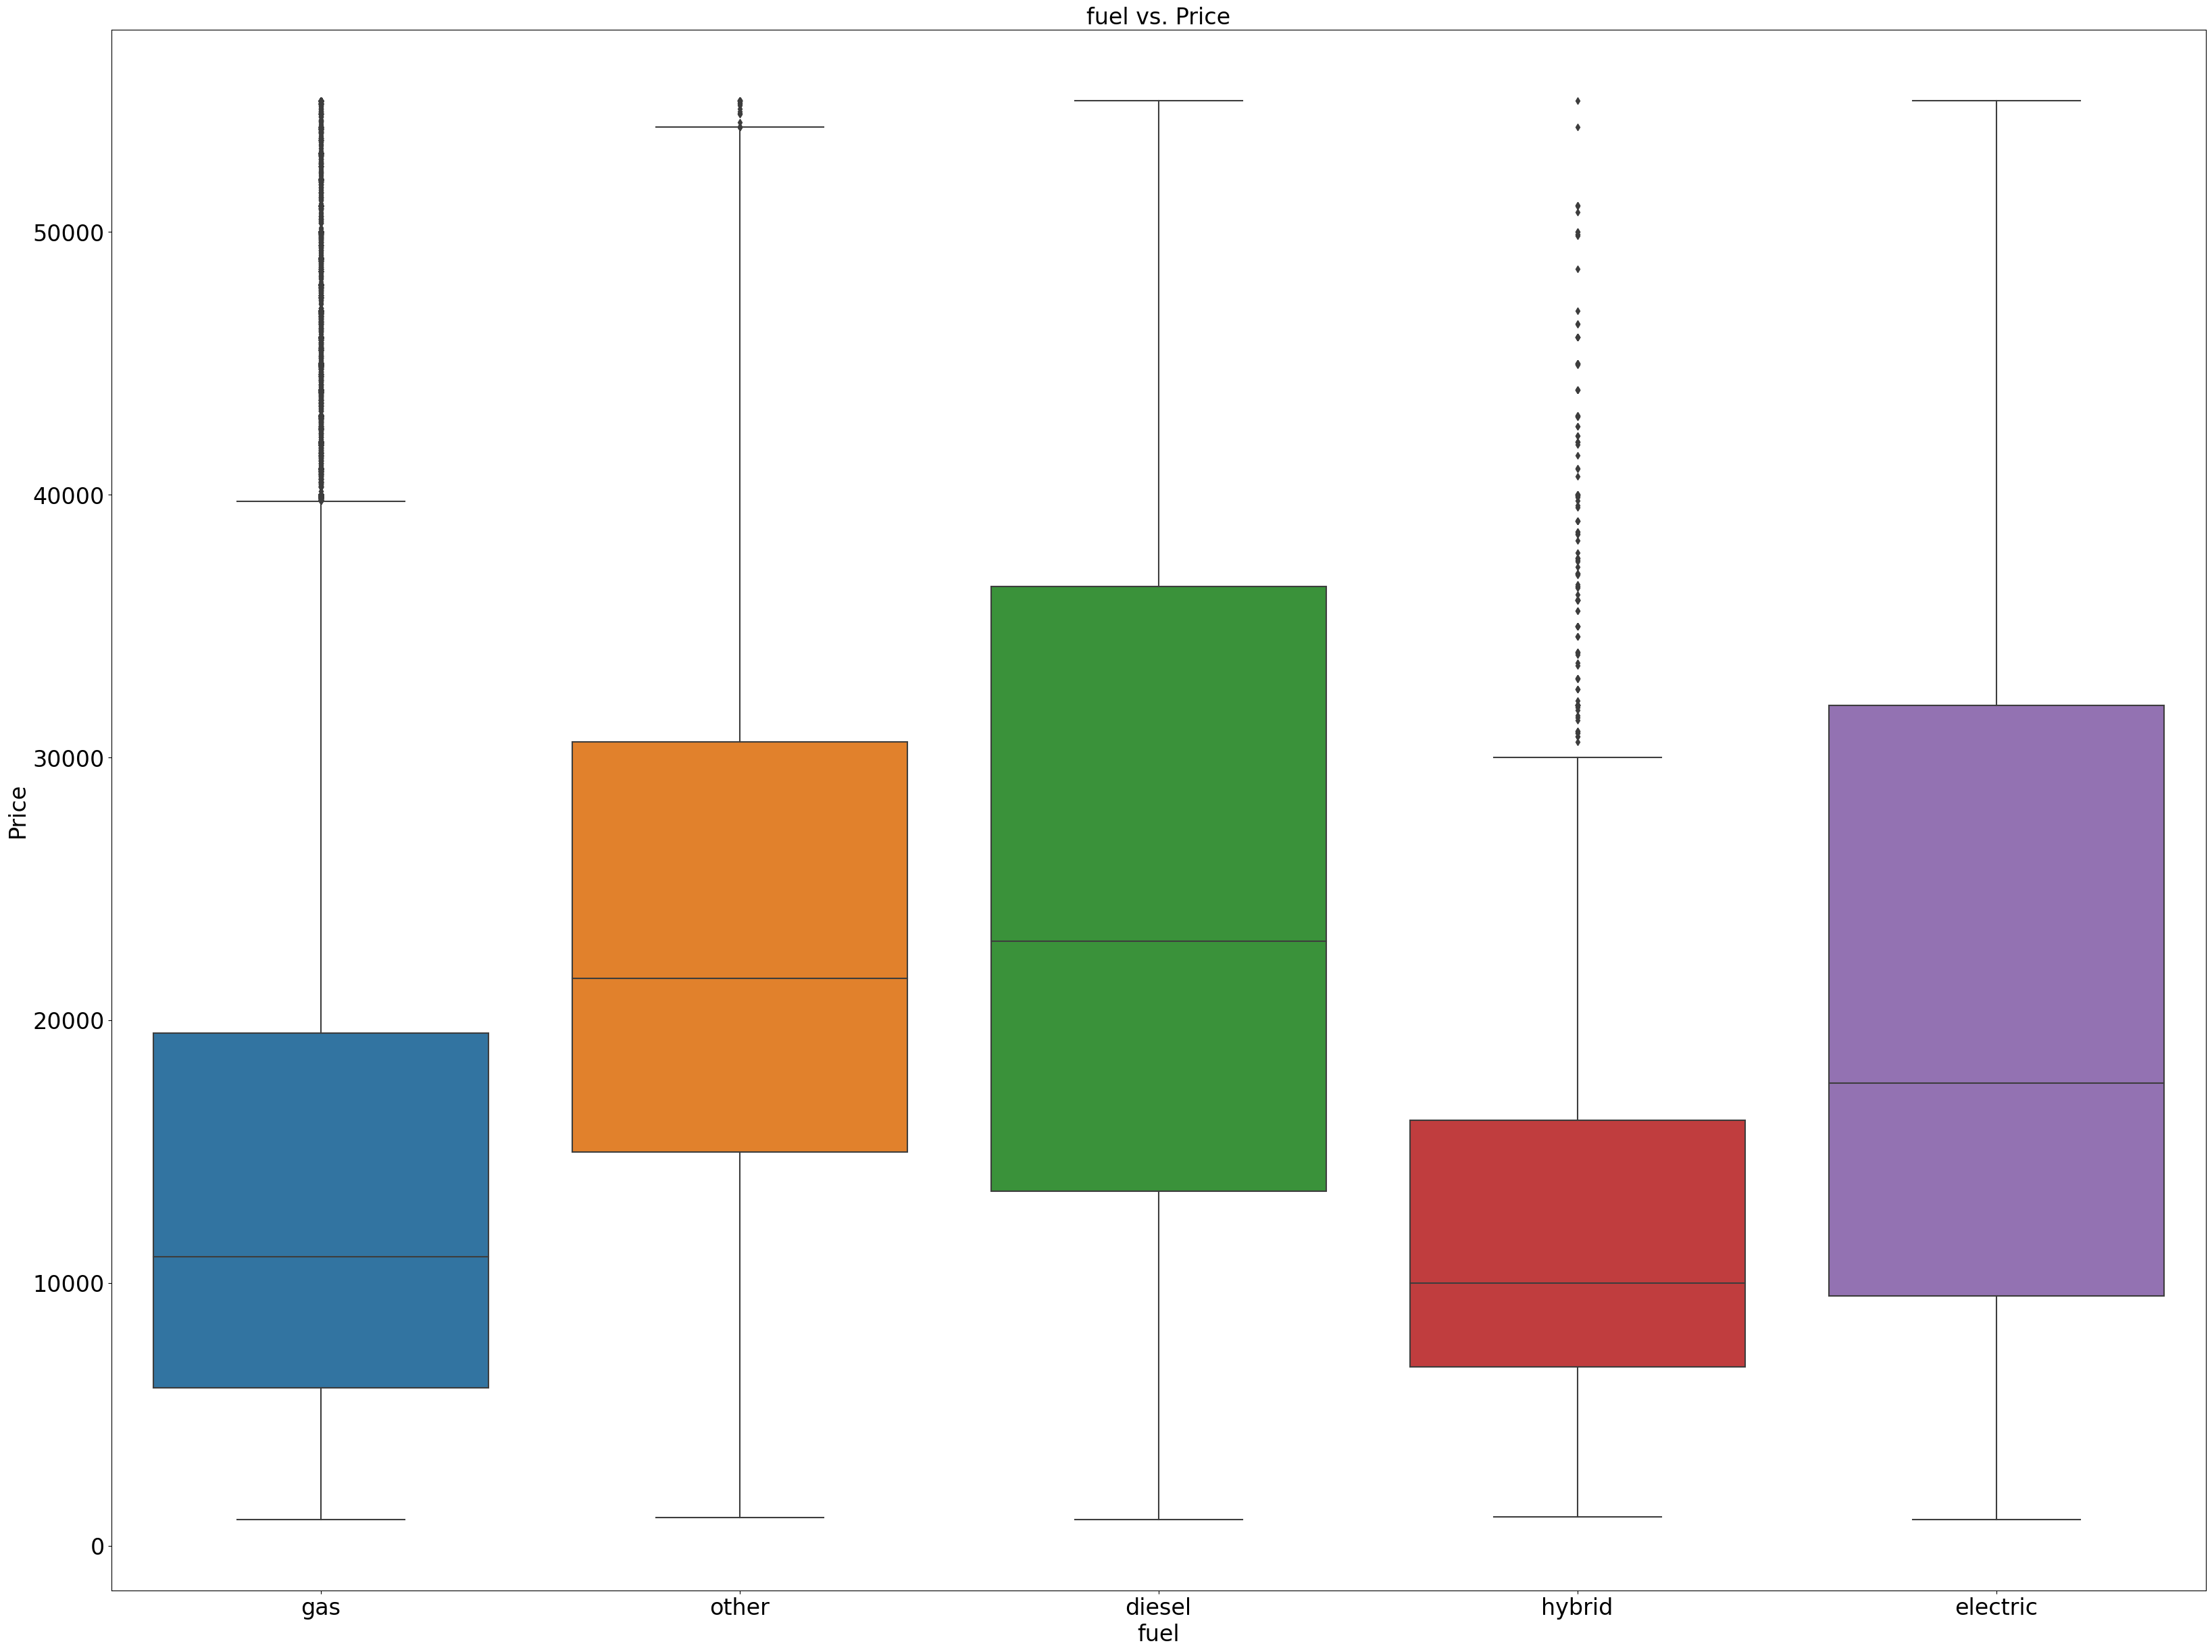

In [47]:
# Categorical Feature vs. Price
plt.figure(figsize=(40, 30))
sns.boxplot(data=df, x='fuel', y='price')
plt.title('fuel vs. Price', fontsize=24)
plt.xlabel('fuel', fontsize=24)
plt.ylabel('Price', fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.show()

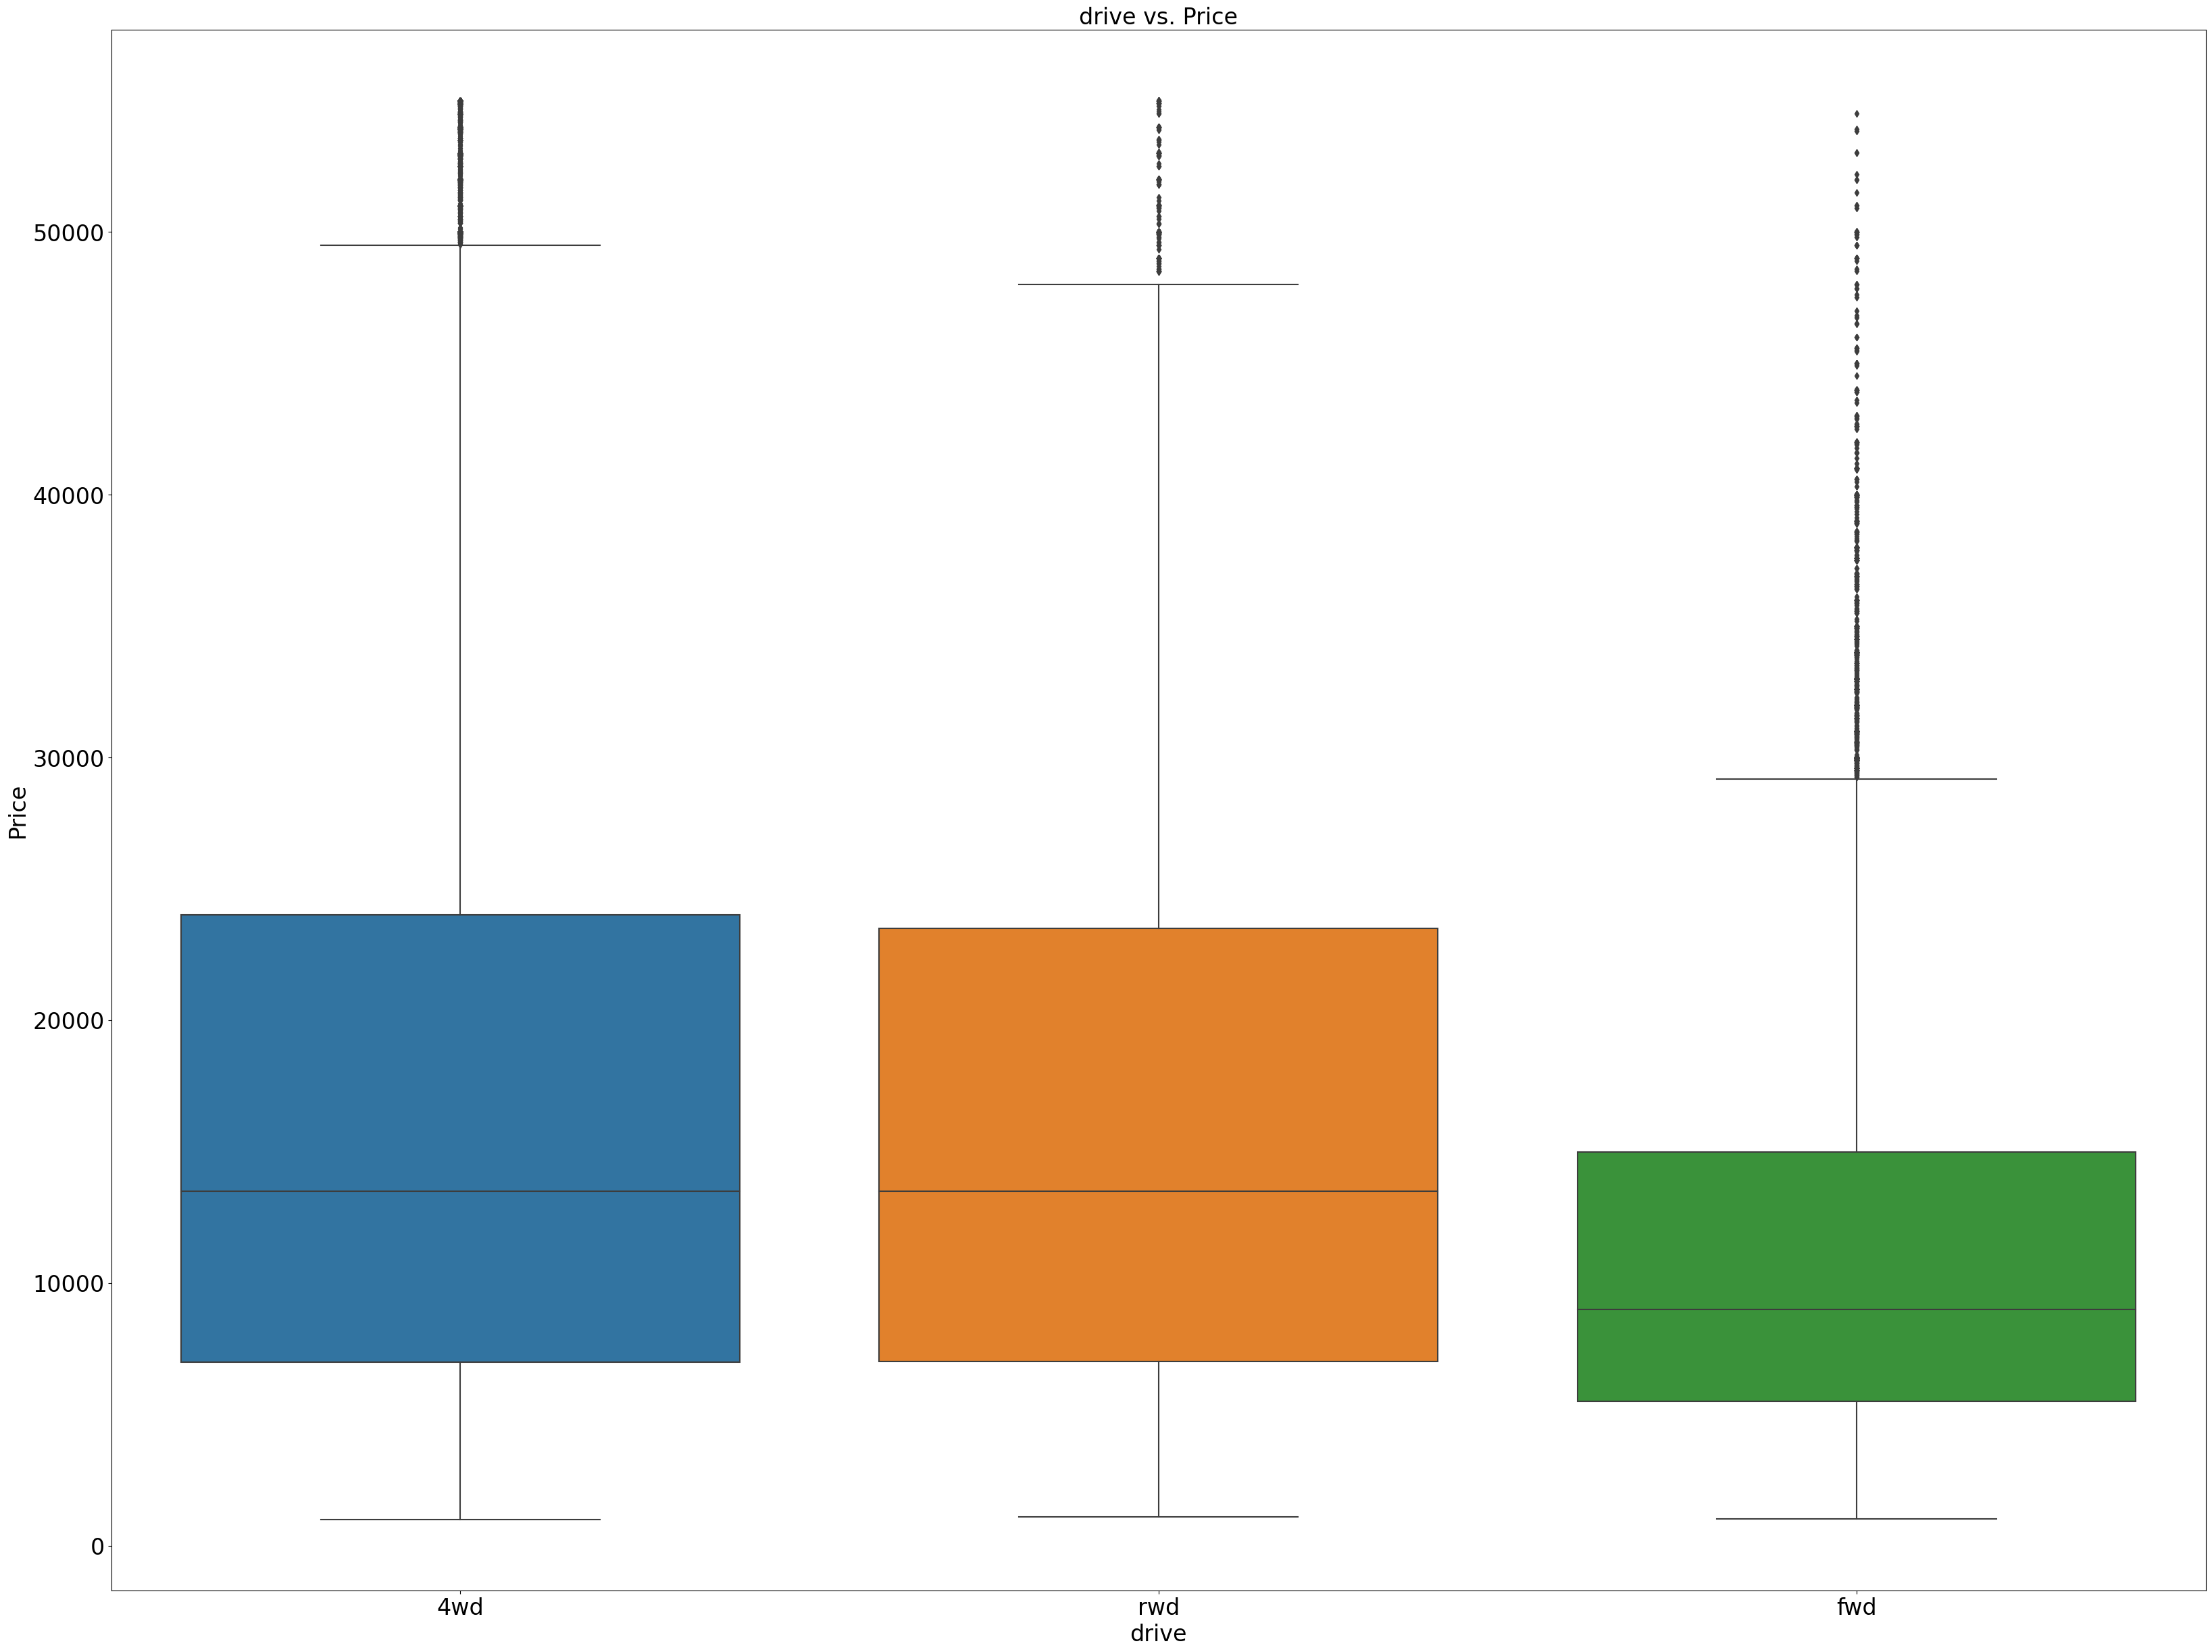

In [48]:
# Categorical Feature vs. Price
plt.figure(figsize=(40, 30))
sns.boxplot(data=df, x='drive', y='price')
plt.title('drive vs. Price', fontsize=24)
plt.xlabel('drive', fontsize=24)
plt.ylabel('Price', fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.show()

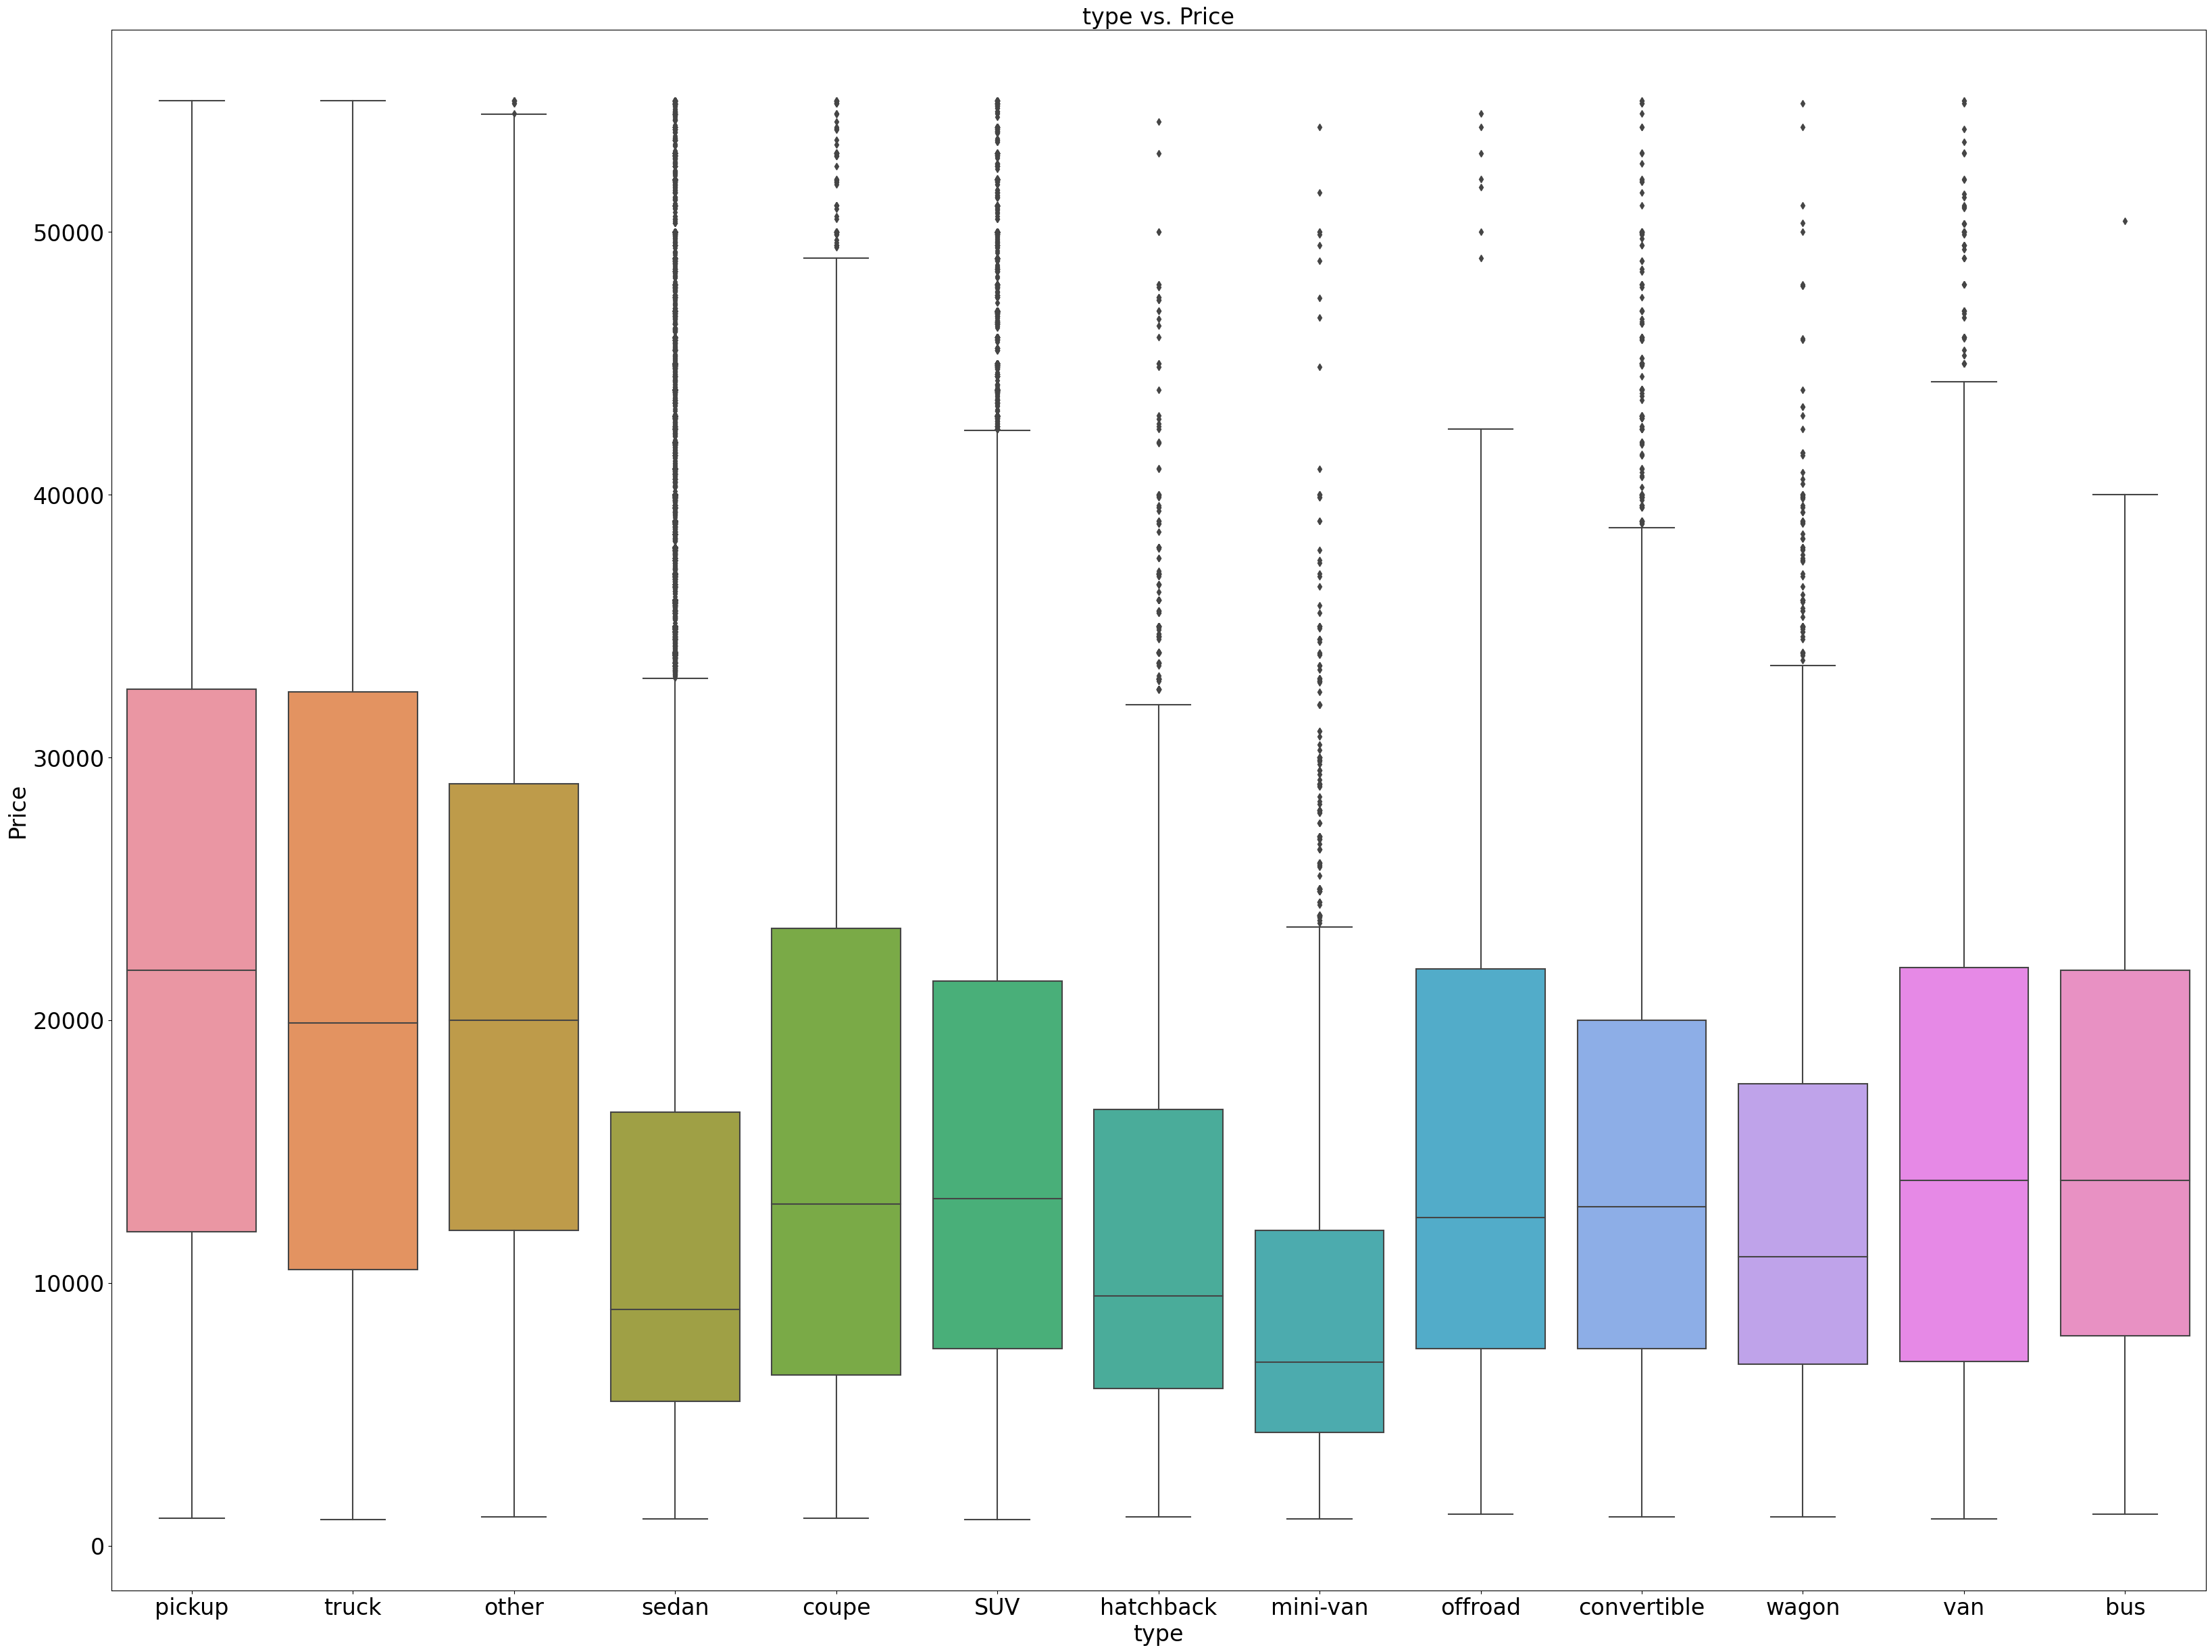

In [49]:
# Categorical Feature vs. Price
plt.figure(figsize=(40, 30))
sns.boxplot(data=df, x='type', y='price')
plt.title('type vs. Price', fontsize=24)
plt.xlabel('type', fontsize=24)
plt.ylabel('Price', fontsize=24)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.show()

### Constructing dataset for modeling.

### Splitting the data into test and train sets. 

In [50]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state = 42)
X_test.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 59136 entries, 21908 to 421144
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          59136 non-null  float64
 1   manufacturer  59136 non-null  object 
 2   model         59136 non-null  object 
 3   condition     59136 non-null  object 
 4   cylinders     59136 non-null  object 
 5   fuel          59136 non-null  object 
 6   odometer      59136 non-null  float64
 7   transmission  59136 non-null  object 
 8   drive         59136 non-null  object 
 9   type          59136 non-null  object 
dtypes: float64(2), object(8)
memory usage: 5.0+ MB


### Setting up pre processors to process the data which will be used in the pipeline. 

In [51]:
categorical_features = ['manufacturer', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'type']
numerical_features = ['year', 'odometer']
print ( categorical_features, numerical_features)

preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_features),
    (StandardScaler(), numerical_features)
)

['manufacturer', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'type'] ['year', 'odometer']


In [52]:
linear_pipe = Pipeline([('preprocessor', preprocessor),('model',LinearRegression())])

In [53]:
param_grid = {'model__fit_intercept': [True, False]} 

In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV

grid_search = GridSearchCV(linear_pipe, param_grid = param_grid, cv = 5).fit(X_train, y_train)

In [55]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters:", best_params)
print("Best Score (on training data):", best_score)

Best parameters: {'model__fit_intercept': False}
Best Score (on training data): 0.5870622951728031


## Exploring test scores

In [56]:
best_model =  grid_search.best_estimator_
test_score  = best_model.score(X_test,y_test)
print("Test score:", test_score)
type(best_model)

# intercept = best_model.intercept_
# coefficients = best_model.coef_  # Returns an array of coefficients

model_step = best_model.named_steps['model']  # Assuming 'model' is your model's name in the pipeline 
coefficients = model_step.coef_
intercept = model_step.intercept_

Test score: 0.5838055174729859


In [57]:
preprocessor = best_model.named_steps['preprocessor']
transformed_feature_names = preprocessor.get_feature_names_out()
all_feature_names = ['intercept'] + transformed_feature_names.tolist()
coefficients_df = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': [intercept] + coefficients.tolist()})

In [58]:
coefficients_df.head()

,Feature,Coefficient
0,intercept,0.000000
1,onehotencoder__manufacturer_acura,940.336582
2,onehotencoder__manufacturer_alfa-romeo,4363.150238
3,onehotencoder__manufacturer_aston-martin,12510.921368
4,onehotencoder__manufacturer_audi,1415.572027


In [59]:
from sklearn.inspection import permutation_importance
encoded_matrix = preprocessor.transform(X_train)
# Permutation Importance (Calculates importance with encoded features)
result = permutation_importance(model_step, encoded_matrix.toarray() , y_train, n_repeats=5)
feature_importances = result.importances_mean

# Get original feature names
feature_names = preprocessor.get_feature_names_out()

# Print Results
for name, importance in zip(feature_names, feature_importances):
    print(f"Feature: {name}, Importance: {importance:.4f}")

Feature: onehotencoder__manufacturer_acura, Importance: 0.0002
Feature: onehotencoder__manufacturer_alfa-romeo, Importance: 0.0003
Feature: onehotencoder__manufacturer_aston-martin, Importance: 0.0001
Feature: onehotencoder__manufacturer_audi, Importance: 0.0005
Feature: onehotencoder__manufacturer_bmw, Importance: 0.0000
Feature: onehotencoder__manufacturer_buick, Importance: 0.0008
Feature: onehotencoder__manufacturer_cadillac, Importance: 0.0000
Feature: onehotencoder__manufacturer_chevrolet, Importance: 0.0001
Feature: onehotencoder__manufacturer_chrysler, Importance: 0.0028
Feature: onehotencoder__manufacturer_datsun, Importance: 0.0002
Feature: onehotencoder__manufacturer_dodge, Importance: 0.0015
Feature: onehotencoder__manufacturer_ferrari, Importance: 0.0000
Feature: onehotencoder__manufacturer_fiat, Importance: 0.0014
Feature: onehotencoder__manufacturer_ford, Importance: 0.0003
Feature: onehotencoder__manufacturer_gmc, Importance: 0.0026
Feature: onehotencoder__manufacturer_

### Let us plot this data 

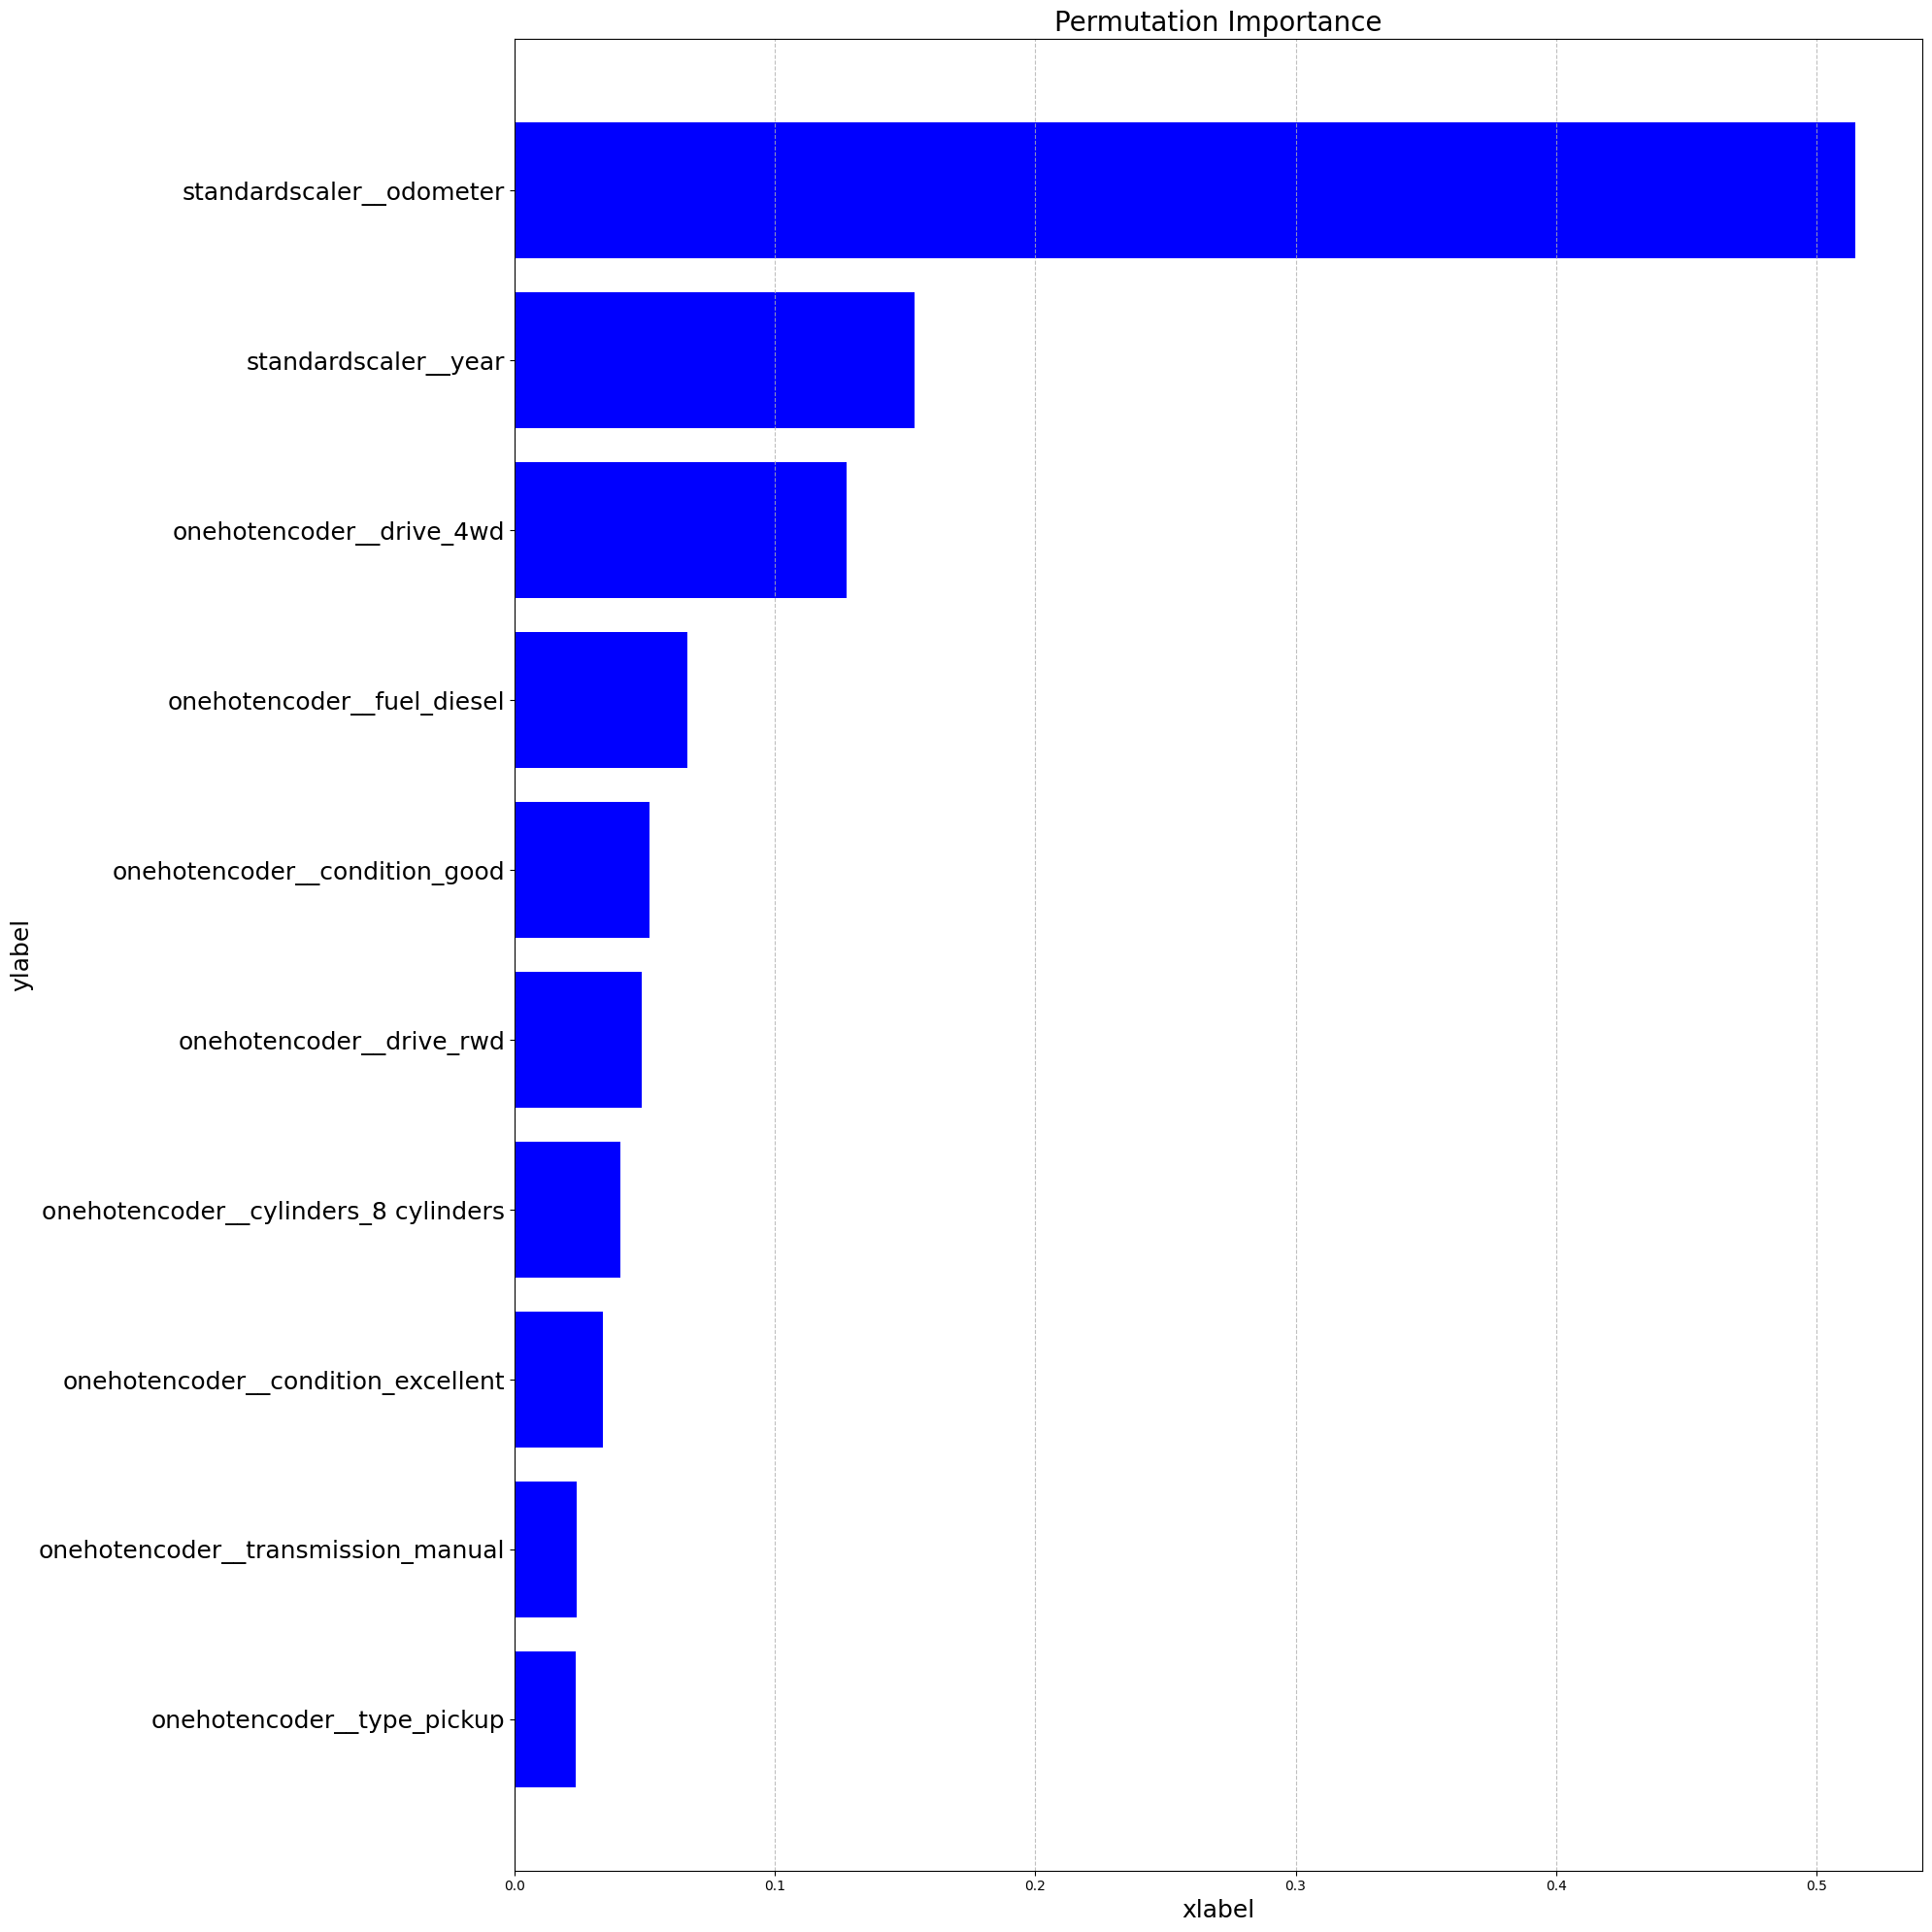

In [60]:
# Create DataFrame
df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort by importance
df = df.sort_values(by='Importance', ascending=False)
Top_df = df.head(10)
# Plot
plt.figure(figsize=(20, 20))
plt.barh(Top_df['Feature'], Top_df['Importance'], color='Blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Importance', fontsize=20)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.yticks(fontsize=18)
plt.gca().invert_yaxis()  # Invert y-axis to display most important on top
plt.grid(axis='x', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

In [61]:
Top_df

,Feature,Importance
80,standardscaler__odometer,0.514874
79,standardscaler__year,0.153582
63,onehotencoder__drive_4wd,0.127588
55,onehotencoder__fuel_diesel,0.066316
43,onehotencoder__condition_good,0.051843
65,onehotencoder__drive_rwd,0.049074
53,onehotencoder__cylinders_8 cylinders,0.040555
41,onehotencoder__condition_excellent,0.034034
61,onehotencoder__transmission_manual,0.024089
74,onehotencoder__type_pickup,0.023526


### Feature importance clearly suggests that Odometer is the top contributor followed by Year and Drive Type.

### Since there is not much use for the manufacturer and the model columns we will use the Sequential feature selection to limit the number of parameters. 

In [62]:
## We are importing libraries to feature selection 
from sklearn.feature_selection import SequentialFeatureSelector

param_grid = {'selector__n_features_to_select': [5]}

linear_pipe = Pipeline([('preprocessor', preprocessor),
                        ('selector', SequentialFeatureSelector(LinearRegression()) ), 
                        ('model', LinearRegression())])
                                                        
grid_search = GridSearchCV(linear_pipe, param_grid=param_grid, cv=5).fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters:", best_params)

print("Best Score (on training data):", best_score)

Best parameters: {'selector__n_features_to_select': 5}
Best Score (on training data): 0.5016556494263783


In [63]:
## retriving the best model 
best_model =  grid_search.best_estimator_
model_step = best_model.named_steps['model']
selector = best_model.named_steps['selector']
coefficients = model_step.coef_
intercept = model_step.intercept_

preprocessor = best_model.named_steps['preprocessor']
selector_step = best_model.named_steps['selector']
selected_features_mask = selector_step.get_support()

# Examining the coeffients
feature_names = preprocessor.get_feature_names_out()
selected_feature_names = [name for name, selected in zip(feature_names, selected_features_mask) if selected]
print(selected_feature_names)
print("Coefficients:", coefficients)


['onehotencoder__cylinders_8 cylinders', 'onehotencoder__fuel_diesel', 'onehotencoder__drive_fwd', 'standardscaler__year', 'standardscaler__odometer']
Coefficients: [ 4986.09474889 11506.31834991 -5594.74660226  3370.21468099
 -5791.98002672]


### Applying ridge regression

In [64]:
import numpy as np
from sklearn.linear_model import  Ridge
from sklearn.metrics import mean_squared_error

ridge_param_dict = {'ridge__alpha':np.logspace(0, 10, 50)}

ridge_pipe = Pipeline([('preprocessor', preprocessor),
                                     ('ridge', Ridge())])

ridge_grid = GridSearchCV(estimator = ridge_pipe,
                          param_grid = ridge_param_dict,
                          scoring = "neg_mean_squared_error")

ridge_grid.fit(X_train,y_train)

train_preds = ridge_grid.best_estimator_.predict(X_train)
test_preds = ridge_grid.best_estimator_.predict(X_test)

ridge_train_mse = mean_squared_error(train_preds,y_train)
ridge_test_mse = mean_squared_error(test_preds,y_test)


print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')
ridge_pipe


Train MSE: 51895460.26560649
Test MSE: 51884748.86171748


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['manufacturer', 'condition',
                                                   'cylinders', 'fuel',
                                                   'transmission', 'drive',
                                                   'type']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['year', 'odometer'])])),
                ('ridge', Ridge())])

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Upon running various regression algorithms on our dataset, it has become evident that the odometer reading and model year of a used car are significant factors influencing its price. However, due to the high dimensionality of our data and the computational complexity involved, some of these algorithms, particularly those requiring grid search or extensive parameter optimization, are encountering difficulties in converging to a solution or completing their search within a reasonable time frame.

In [65]:
## Lets add poly features to the numeric data so we can see if the accuracy or Linearregression improves that that is best score as of now.
from sklearn.preprocessing import PolynomialFeatures
categorical_features = ['manufacturer', 'condition', 'cylinders', 'fuel', 'transmission', 'drive',
                        'type']
numerical_features = ['year', 'odometer']
print(categorical_features, numerical_features)

preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_features),
   ( PolynomialFeatures(degree=3, include_bias=False),numerical_features ),
    (StandardScaler(), numerical_features)
)
linear_pipe = Pipeline([('preprocessor', preprocessor), ('model', LinearRegression())])
param_grid = {'model__fit_intercept': [True, False]}
grid_search = GridSearchCV(linear_pipe, param_grid=param_grid, cv=5).fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Pparameters:", best_params)
print("Best Score (on training data):", best_score)


['manufacturer', 'condition', 'cylinders', 'fuel', 'transmission', 'drive', 'type'] ['year', 'odometer']
Best Pparameters: {'model__fit_intercept': True}
Best Score (on training data): 0.31435856532525774
